In [54]:
# This file is for testing the trained model and comparing it with pretrained model
# to assess its performance.

# The training and testing files are seperated to prevent, re-training of the model
# for testing it.

# The pretrained model used for comparision is MobileNetV3.

In [55]:
# Mount Google drive for importing the saved model
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
#Install opencv for importing pretrained MobileNetV3.
#opencv v4.5.4.58 is required for smooth running of the code.

!pip install --upgrade opencv-python

In [57]:
# Import all necessary modules.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
import cv2
import os
import pickle 
from google.colab.patches import cv2_imshow

In [58]:
#Test dataset location
testing_loc = '/content/drive/MyDrive/Unbiased_Enthusiasts/Our_model/Dataset/Test_data' 

#Lables for test dataset
testing_loc_labels = '/content/drive/MyDrive/Unbiased_Enthusiasts/Our_model/Dataset/test.csv' 

**1) Our Model**

In [59]:
# Loading the saved model

DATA_PATH = "/content/drive/MyDrive/Unbiased_Enthusiasts/Our_model/Saved_model"
infile = open(DATA_PATH+'/Pickle_Model.pkl','rb')
Pickled_Model = pickle.load(infile)

In [60]:
def load_images_from_folder(folder,names,cou):

    """ this function takes the images(Total=n) and resize them to (256,256)
        resolution and prepares the data for training """

    images = []
    y=[]
    c=0
    for filename in os.listdir(folder):
      if filename in names:
        index=names.index(filename)
        c=c+1

        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img,(256,256))
        if img is not None:
            images.append(img)
            y.append(cou[index])
        # if c==n:
        #   break
    return [images,y]

In [61]:
test_labels=pd.read_csv(testing_loc_labels)
names1=[]
count_df1=[]
for i in range(len(test_labels)):
  names1.append(test_labels['Name'][i])
  count_df1.append(test_labels['Count'][i])

In [62]:
testing_for_accuracy = load_images_from_folder(testing_loc,names1,count_df1)
testing_for_accuracy_x = np.array(testing_for_accuracy[0])
testing_for_accuracy_x.shape

(30, 256, 256, 3)

In [63]:
#Predicting the number of people using trained CNN model
predictions = Pickled_Model.predict(testing_for_accuracy_x) 

In [64]:
# Appending the detected number of peopel in the frame
results_from_trained_model = [] 
for i in range(len(testing_for_accuracy[0])):
  results_from_trained_model.append(round(predictions[i][0]))

In [65]:
 # Manually written values of number of people in the frame
y1 = testing_for_accuracy[1][0:len(testing_for_accuracy_x)]

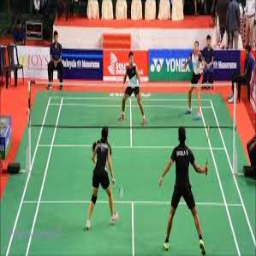

The predicted vcalue is  3


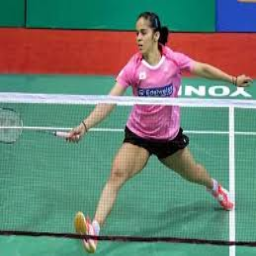

The predicted vcalue is  3


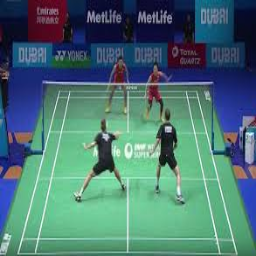

The predicted vcalue is  3


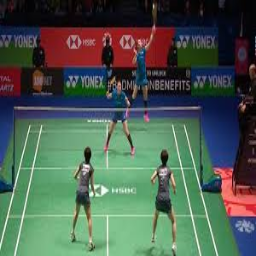

The predicted vcalue is  2


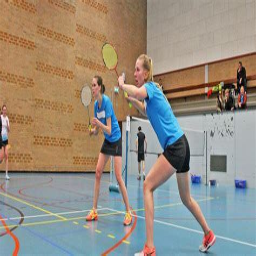

The predicted vcalue is  3


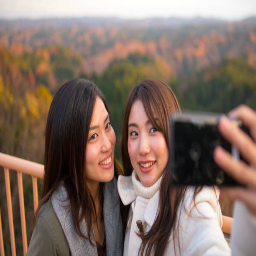

The predicted vcalue is  3


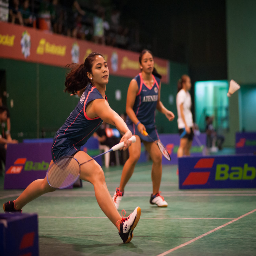

The predicted vcalue is  3


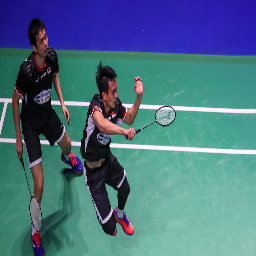

The predicted vcalue is  2


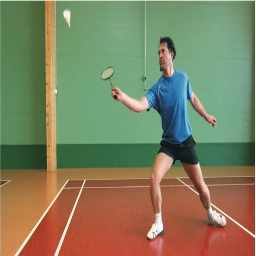

The predicted vcalue is  2


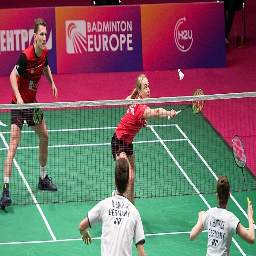

The predicted vcalue is  5


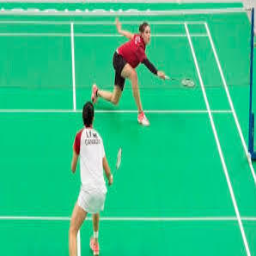

The predicted vcalue is  2


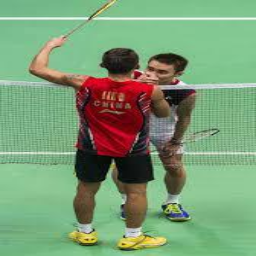

The predicted vcalue is  2


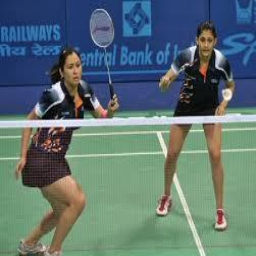

The predicted vcalue is  3


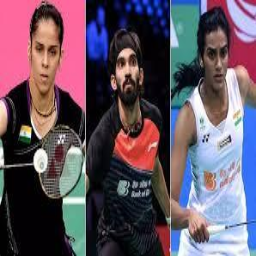

The predicted vcalue is  4


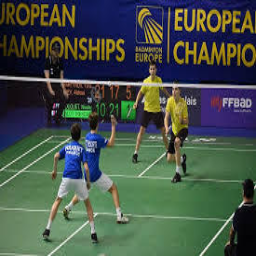

The predicted vcalue is  3


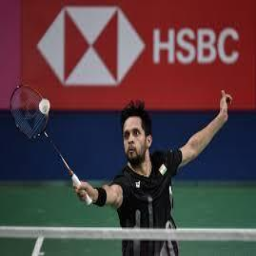

The predicted vcalue is  3


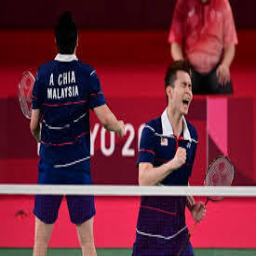

The predicted vcalue is  4


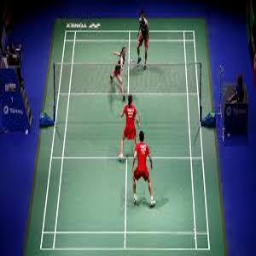

The predicted vcalue is  3


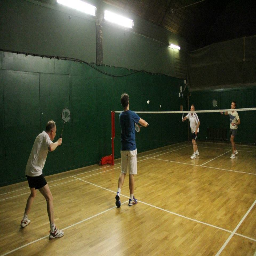

The predicted vcalue is  2


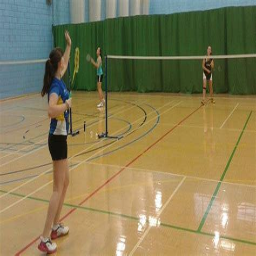

The predicted vcalue is  2


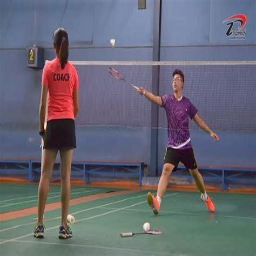

The predicted vcalue is  3


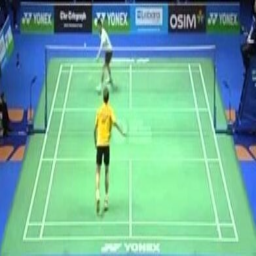

The predicted vcalue is  3


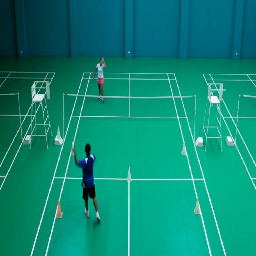

The predicted vcalue is  2


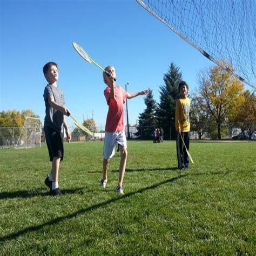

The predicted vcalue is  4


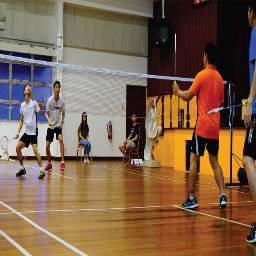

The predicted vcalue is  5


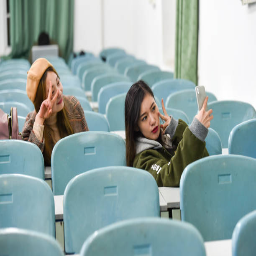

The predicted vcalue is  3


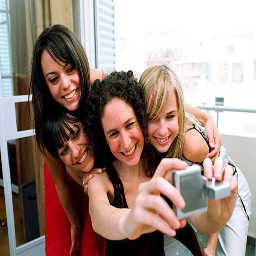

The predicted vcalue is  4


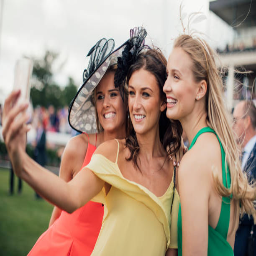

The predicted vcalue is  4


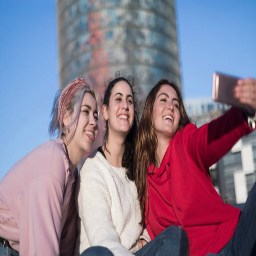

The predicted vcalue is  4


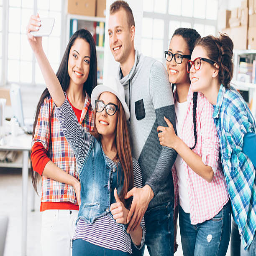

The predicted vcalue is  5
The accuracy of trained CNN model on the test dataset is 26.67 %


In [66]:
# calculating accuracy of CNN model
d = 0
for i in range(len(results_from_trained_model)):
    cv2_imshow(testing_for_accuracy[0][i])
    print("The predicted vcalue is ",results_from_trained_model[i]);
    if y1[i] == results_from_trained_model[i]:
        d = d+1
    accu = d*100/len(y1)
print('The accuracy of trained CNN model on the test dataset is',round(accu,2),'%')

### **2.Pretrained model**


In [33]:
# Loading the pretrained model

#configuration file.
config_file = '/content/drive/MyDrive/Unbiased_Enthusiasts/Pretrained_model/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt' 

#Pretrained model
frozen_model = '/content/drive/MyDrive/Unbiased_Enthusiasts/Pretrained_model/frozen_inference_graph.pb' 

In [34]:
# Changing the data feeded to the model to the defined resolution and size for the pretrained model
premodel = cv2.dnn_DetectionModel(frozen_model,config_file)
premodel.setInputSize(320,320)
premodel.setInputScale(1/127.5)
premodel.setInputMean((127.5,127.5,127.5))
premodel.setInputSwapRB(True)

<dnn_Model 0x7fd73842df30>

In [35]:
classlabels = []
file_name = '/content/drive/MyDrive/Unbiased_Enthusiasts/Pretrained_model/Labels.txt' 
with open(file_name,'rt') as fpt:
  classlabels = fpt.read().rstrip('\n').split('\n')

In [67]:
def pretrained_model(folder,names,model,coun):
    """ A function which takes location of dataset, filename of the data,
        labels of the data and the pretrained model as input and gives
        number of people detected in the frame as output."""
    c=0
    image_tracker = []
    original = []
    for filename in os.listdir(folder):
        if filename in names:
            index=names.index(filename)
            # print(filename, end="  ")
            c=c+1
            # print(c)

            img = cv2.imread(os.path.join(folder,filename))
            ClassIndex, _ , _ = model.detect(img,confThreshold=0.5)
            d = ClassIndex.tolist()
            if d is not None:
                image_tracker.append(d.count(1))
                original.append(coun[index])
    return [image_tracker,original]

In [68]:
difi = pretrained_model(testing_loc,names1,premodel,count_df1)

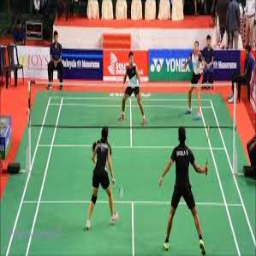

The predicted value is  7


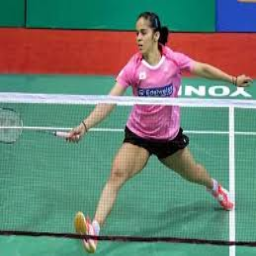

The predicted value is  1


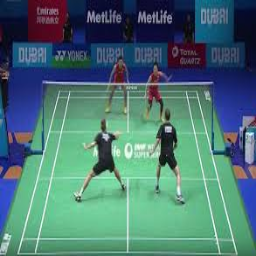

The predicted value is  5


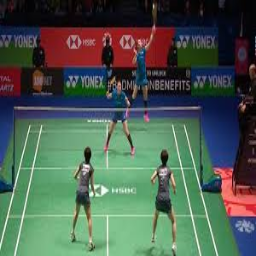

The predicted value is  6


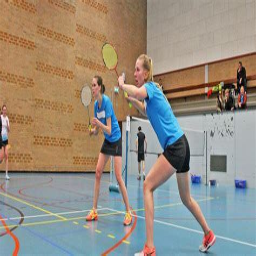

The predicted value is  5


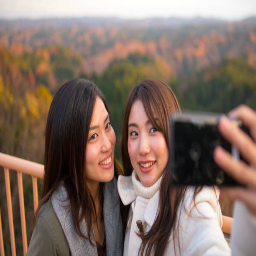

The predicted value is  2


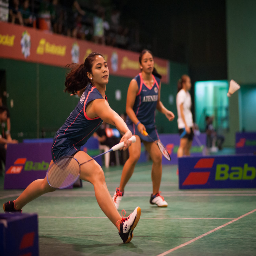

The predicted value is  13


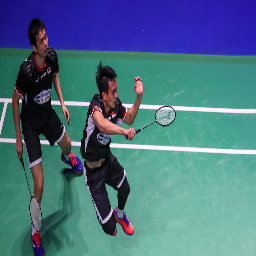

The predicted value is  2


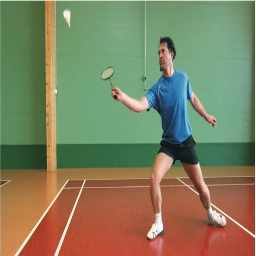

The predicted value is  1


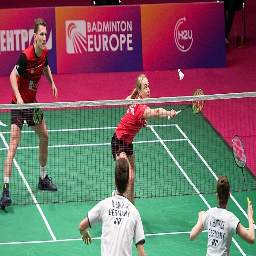

The predicted value is  5


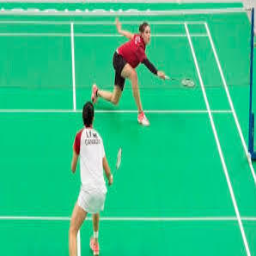

The predicted value is  2


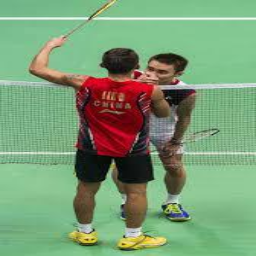

The predicted value is  2


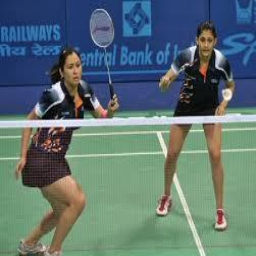

The predicted value is  3


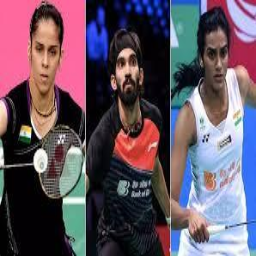

The predicted value is  3


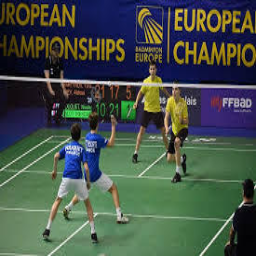

The predicted value is  7


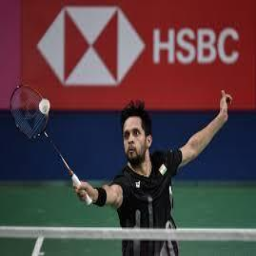

The predicted value is  1


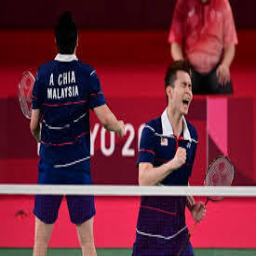

The predicted value is  3


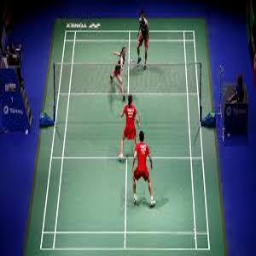

The predicted value is  7


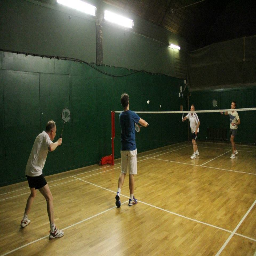

The predicted value is  4


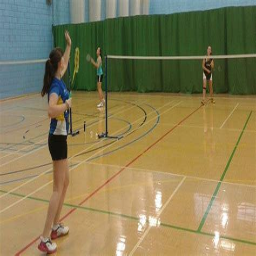

The predicted value is  4


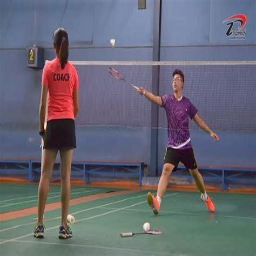

The predicted value is  2


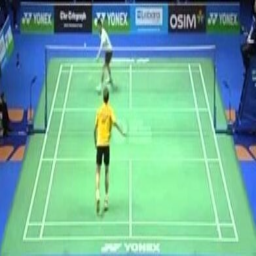

The predicted value is  2


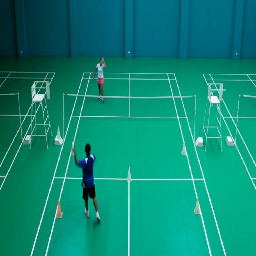

The predicted value is  2


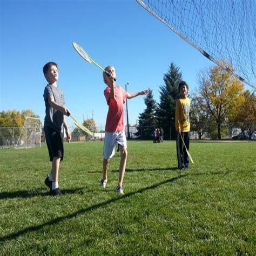

The predicted value is  4


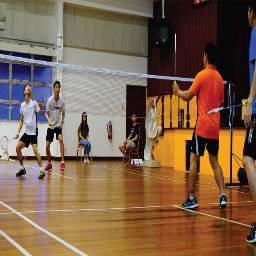

The predicted value is  5


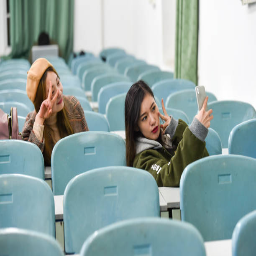

The predicted value is  3


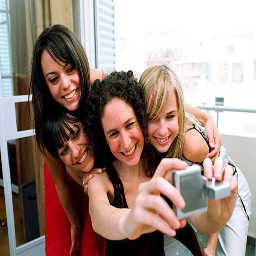

The predicted value is  4


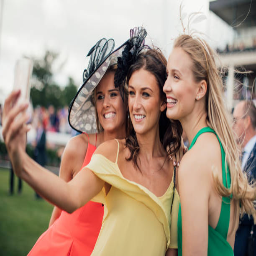

The predicted value is  6


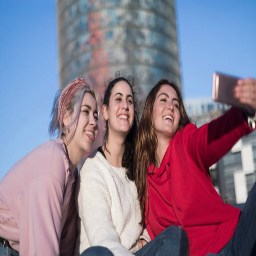

The predicted value is  3


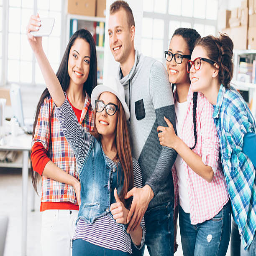

The predicted value is  5
The accuracy of pretrained model on the test dataset is 53.33 %


In [69]:
# Calculating Accuracy of the pretrained model.
pre_accu=0
for i in range(len(difi[0])):

    cv2_imshow(testing_for_accuracy[0][i])
    print("The predicted value is ",difi[0][i])
    if difi[0][i] == difi[1][i]:
        pre_accu = pre_accu+1

Mobilenet_accu = pre_accu*100/len(difi[0])
print('The accuracy of pretrained model on the test dataset is',round(Mobilenet_accu,2),'%')